Preparing the data

In [66]:
import pandas as pd
import numpy as np
import random

In [67]:
df = pd.read_csv(r'Bank_Personal_Loan_Modelling.csv')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [69]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [70]:
df=df.drop(['ID'],axis=1)

In [71]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1edc8aec590>,
 'caps': [<matplotlib.lines.Line2D at 0x1edc8e8d310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1edc38de910>],
 'medians': [<matplotlib.lines.Line2D at 0x1edcb643f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1edcb640190>],
 'means': []}

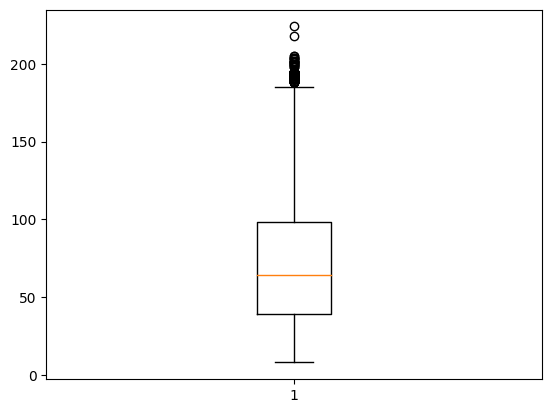

In [72]:
plt.boxplot(df['Income'])

In [73]:
inc_index = df[df['Income']>160].index

In [74]:
df = df.drop(inc_index)

{'whiskers': [<matplotlib.lines.Line2D at 0x1edcb88b210>,
 'caps': [<matplotlib.lines.Line2D at 0x1edcb98b250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1edcb989910>],
 'medians': [<matplotlib.lines.Line2D at 0x1edcb994450>],
 'fliers': [<matplotlib.lines.Line2D at 0x1edcb98a8d0>],
 'means': []}

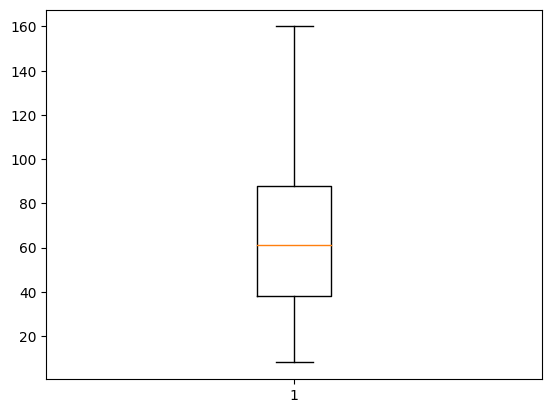

In [75]:
plt.boxplot(df['Income'])

In [76]:

df_input = df.drop(['Personal Loan'],axis=1)

In [77]:
df_input.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,Y_train,Y_test = train_test_split(df_input.values,df['Personal Loan'].values,test_size=0.25,random_state=46,stratify=df['Personal Loan'])

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
sc=StandardScaler()

In [82]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [83]:
import tensorflow as tf

In [84]:
X_train.shape

(3498, 12)

In [85]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(12, activation='relu',name='firstlayer'),
  tf.keras.layers.Dense(1,activation='sigmoid',name='secondlayer')])

In [86]:
output = model(X_train)

In [87]:
from sklearn.preprocessing import LabelEncoder

In [88]:
lc = LabelEncoder()

In [89]:
ini_pred  =lc.fit_transform(output.numpy().flatten()>0.5) 

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
accuracy_score(Y_train,ini_pred)

0.7990280160091481

In [92]:
model.layers[0].get_weights()
#model.set_weights([weights])

[array([[-2.84104347e-02,  4.02028918e-01,  5.23345470e-02,
         -2.87117481e-01,  2.63757706e-02,  2.03542233e-01,
          1.21447563e-01, -3.53081346e-01, -1.25306368e-01,
         -4.87722039e-01, -2.71541238e-01,  4.69984531e-01],
        [-4.22300696e-01, -1.74515367e-01,  4.05227542e-01,
          4.55911279e-01, -4.96150851e-01, -3.97602320e-02,
         -4.78805423e-01,  5.49052954e-02,  4.05265450e-01,
          4.47927713e-01, -2.34350562e-01,  1.06259823e-01],
        [ 1.68673396e-01,  2.28660583e-01,  4.90100741e-01,
          1.90234303e-01,  4.45242524e-01, -4.81512547e-01,
         -3.03497434e-01, -1.78595304e-01, -3.34817648e-01,
         -2.38621354e-01,  2.04425097e-01,  4.34693098e-02],
        [ 2.33751535e-02,  3.25212002e-01,  1.81410074e-01,
          9.39226151e-03, -1.63286090e-01,  1.53562903e-01,
          1.67292118e-01, -2.11609483e-01,  1.46405101e-01,
         -2.60876536e-01,  8.16893578e-03, -2.63705730e-01],
        [-2.68244624e-01,  1.2102031

In [93]:
model.get_weights()

[array([[-2.84104347e-02,  4.02028918e-01,  5.23345470e-02,
         -2.87117481e-01,  2.63757706e-02,  2.03542233e-01,
          1.21447563e-01, -3.53081346e-01, -1.25306368e-01,
         -4.87722039e-01, -2.71541238e-01,  4.69984531e-01],
        [-4.22300696e-01, -1.74515367e-01,  4.05227542e-01,
          4.55911279e-01, -4.96150851e-01, -3.97602320e-02,
         -4.78805423e-01,  5.49052954e-02,  4.05265450e-01,
          4.47927713e-01, -2.34350562e-01,  1.06259823e-01],
        [ 1.68673396e-01,  2.28660583e-01,  4.90100741e-01,
          1.90234303e-01,  4.45242524e-01, -4.81512547e-01,
         -3.03497434e-01, -1.78595304e-01, -3.34817648e-01,
         -2.38621354e-01,  2.04425097e-01,  4.34693098e-02],
        [ 2.33751535e-02,  3.25212002e-01,  1.81410074e-01,
          9.39226151e-03, -1.63286090e-01,  1.53562903e-01,
          1.67292118e-01, -2.11609483e-01,  1.46405101e-01,
         -2.60876536e-01,  8.16893578e-03, -2.63705730e-01],
        [-2.68244624e-01,  1.2102031

In [94]:
pred = model.predict(X_test) >=0.5

37/37 [==============================] - 0s 4ms/step


In [95]:
pred = lc.fit_transform(pred.flatten())

In [96]:
accuracy_score(Y_test,pred)

0.8097686375321337

In [97]:
model_ga=tf.keras.Sequential([tf.keras.layers.Dense(12, activation='relu',name='firstlayer'),
  tf.keras.layers.Dense(1,activation='sigmoid',name='secondlayer')])

In [98]:
model_ga(X_train)

<tf.Tensor: shape=(3498, 1), dtype=float32, numpy=
array([[0.5671238 ],
       [0.22152641],
       [0.38526368],
       ...,
       [0.32648474],
       [0.5764875 ],
       [0.63725585]], dtype=float32)>

In [99]:
print(len(model_ga.get_weights()))
print(model_ga.get_weights()[0].shape)
print(model_ga.get_weights()[1].shape)
print(model_ga.get_weights()[2].shape)
print(model_ga.get_weights()[3].shape)

4
(12, 12)
(12,)
(12, 1)
(1,)


In [100]:
def conv_lin_weights_nn_weights(weights):
    we_list=[]
    weights=np.array(weights).flatten()
    w1=np.array(weights[:144])
    w1=w1.reshape(12,12)
    b1=np.array(weights[144:156])
    w2=np.array(weights[156:168])
    w2=w2.reshape(12,1)
    b2=np.array(weights[168:])
    b2=b2.reshape(1)
    we_list.append(w1)
    we_list.append(b1)
    we_list.append(w2)
    we_list.append(b2)

    return we_list

In [101]:
def objective_function(weights,nn):
    we=conv_lin_weights_nn_weights(weights)
    nn.set_weights(we)
    y_pred = nn.predict(X_train)
    y_pred = lc.fit_transform(y_pred.flatten() > 0.5)
    print('accuracy:',round(accuracy_score(y_pred,Y_train),5)*100)
    return accuracy_score(Y_train,y_pred)

In [102]:
class GA:
    def __init__(self,pop_size,chromosome_count,fit_thresh,cross_rate,mut_rate,model,max_iter):
        self.pop_size=pop_size
        self.chromosome_count=chromosome_count
        self.fit_thresh=fit_thresh
        self.cross_rate=cross_rate
        self.mut_rate=mut_rate
        self.model=model
        self.max_iter=max_iter

    def cross(self,c1,c2,prob):
        #uniform crossover
        
        offspring1 = []
        offspring2= []
        for i in range(len(c1)):
            if random.random() < prob:
                offspring1.append(c1[i])
                offspring2.append(c2[i])
            else:
                offspring1.append(c2[i])
                offspring2.append(c1[i])
        return offspring1,offspring2
    
    def mutation(self,m, prob, sigma):
        mu = np.copy(m)
        for i in range(len(mu)):
            ran=random.random()
            if ran < prob:
                mu[i] += np.random.normal(loc=0.0, scale=sigma)
        return mu

    def opti(self,fitness_func):
        max_fit=0
        max_pop=[]
        ini_pop=[]
        fit=[]
        pop=[]
        for i in range(self.pop_size):
            ini_pop.append([np.random.uniform(0.0,1.0,size=self.chromosome_count)])
        for i in range(self.pop_size):
            fit.append(fitness_func(ini_pop[i],self.model))
        max_fit=max(fit)
        max_pop=ini_pop[np.argmax(fit)]
        pop=ini_pop
        count=1
        if(max_fit < self.fit_thresh):
            while(max_fit < self.fit_thresh and count<self.max_iter):
                #retain of same pop without alteration (1-r)*pop_size are retained
                prob=[]
                for i in range(self.pop_size):
                    p=fit[i]/sum(fit)
                    prob.append([p,i])

                prob=sorted(prob,key=lambda x:x[0],reverse=True)
                select_ind=[i[1] for i in prob]
                si = int((1-self.cross_rate)*self.pop_size)
                select_i=select_ind[:si]
                pop_n=[pop[i] for i in select_i]

                #crossover
                pop_c=[pop[i] for i in select_ind[si:]]
                c_pop=[]
                for i in range(len(pop_c)//2):
                    c1,c2=self.cross(pop_c[i],pop_c[-i-1],random.random())
                    c_pop.append([c1])
                    c_pop.append([c2])
                pop_n.extend(c_pop)


                #mutuation
                for i in range(int(self.mut_rate*self.pop_size)):
                    ind=random.randint(0,self.pop_size-1)
                    pop_n[ind]=self.mutation(pop_n[ind],random.random(),0.3)

                pop=pop_n

                #fitness_evaluation
                for i in range(self.pop_size):
                    f=fitness_func(pop[i],self.model)
                    fit.append(f)
                    if(f>max_fit):
                        max_fit=f
                        max_pop=pop[i]

                count+=1

            return max_pop       
        else:
            return max_pop


In [103]:
pop_size=10
chromosome_count=169
fit_thresh=0.95
cross_rate=0.4
mut_rate=0.4
max_gen=30
ga = GA(pop_size,chromosome_count,fit_thresh,cross_rate,mut_rate,model,max_gen)

In [104]:
bw = ga.opti(objective_function)

110/110 [==============================] - 0s 2ms/step
accuracy: 93.482
110/110 [==============================] - 0s 4ms/step
accuracy: 93.482
110/110 [==============================] - 0s 2ms/step
accuracy: 93.482
110/110 [==============================] - 1s 4ms/step
accuracy: 93.482
110/110 [==============================] - 0s 1ms/step
accuracy: 93.482
110/110 [==============================] - 0s 3ms/step
accuracy: 93.482
110/110 [==============================] - 0s 2ms/step
accuracy: 93.482
110/110 [==============================] - 0s 1ms/step
accuracy: 93.482
110/110 [==============================] - 0s 2ms/step
accuracy: 93.482
110/110 [==============================] - 0s 3ms/step
accuracy: 93.482
110/110 [==============================] - 0s 1ms/step
accuracy: 93.482
110/110 [==============================] - 0s 1ms/step
accuracy: 93.482
110/110 [==============================] - 0s 2ms/step
accuracy: 93.482
110/110 [==============================] - 0s 2ms/step
accuracy:

In [105]:
se = conv_lin_weights_nn_weights(bw)
model.set_weights(se)
y_t=model.predict(X_test)
Y_t= lc.fit_transform(y_t.flatten() > 0.5)
print('testcase accuracy:',accuracy_score(Y_test,Y_t)*100)

37/37 [==============================] - 0s 2ms/step
testcase accuracy: 93.31619537275064
